# Classification
- KNN

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn import preprocessing


In [7]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


In [12]:
df["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

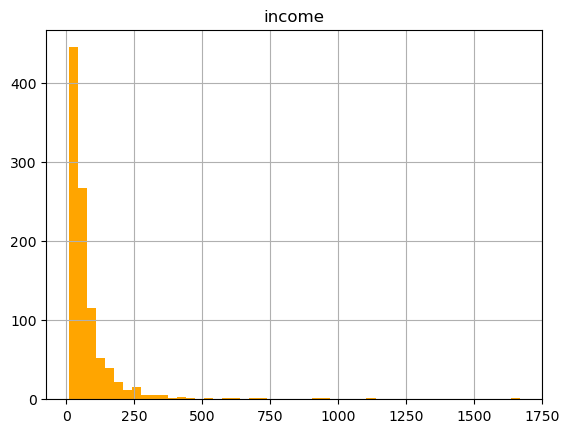

In [18]:
df.hist(column="income", bins=50, color='orange')

<Axes: xlabel='age', ylabel='income'>

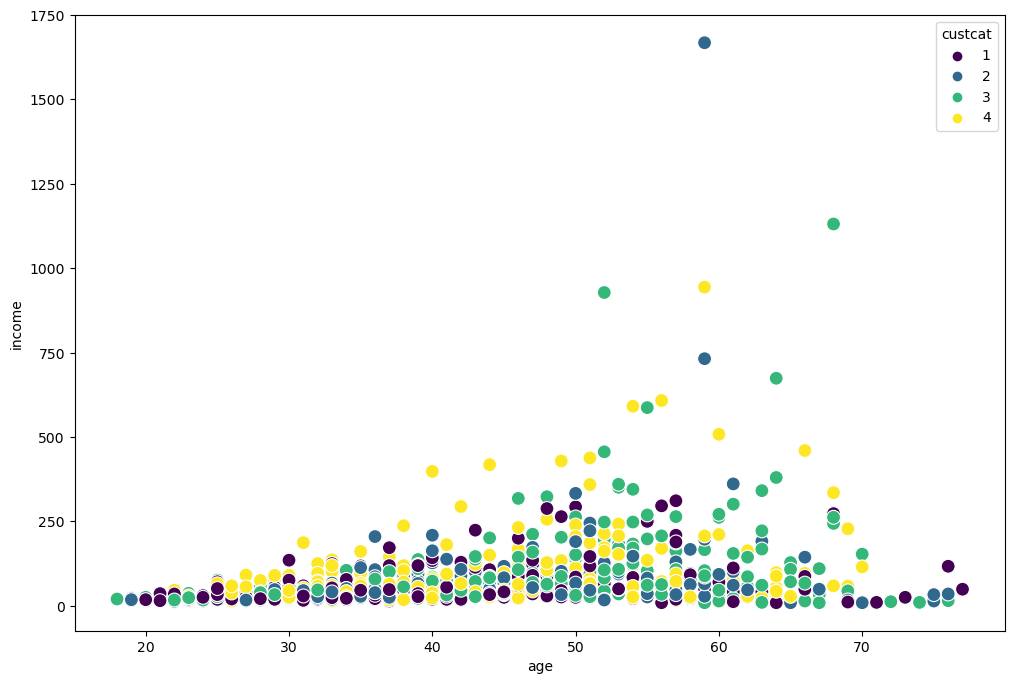

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='age',y='income',hue='custcat', data=df,palette='viridis',s=100)

1- Pick a value for K.                                                                                    
2-Calculate the distance of unknown case from all cases (dissimilarity)                                        
3-Select the K-observations in the training data that are nearest to the unknown data point.                  
4-Predict the response of the unknown data point, using the most popular response value from the K-nearest neigbors.

For unknown case, first pick K=1                                                                               
Calculate and make prediction until K=20                                                                     
Compare results.

### Exercise
- Normalize the data: StandardScaler                                                                        
- Classification: KNeighborsClassification                                                                     
- Training K=4
- Evaluation: accuracy_score()

In [25]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']]
y = df['custcat']

# StandardScaler for normalization of data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separating the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
k = 4 #can be modified to suit the ideal result
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

# calculation of truth value
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.325
